<center>
  <h1> L’analyse des sentiments avec NLP </h1>
</center>

# 1- installation et Importation des bibliothèques nécessaires

## 1-1 INSTALLATION

Dans le cadre de notre projet d'analyse des sentiments en utilisant le traitement du langage naturel (NLP), nous avons sélectionne plusieurs bibliothèques Python puissantes pour manipuler, visualiser et analyser les données. Ces bibliotheques sont essentielles pour le développement d'un modèle d'analyse des sentiments robuste et la création de visualisations informatives.

Nous utiliserons Pandas, Matplotlib, et Seaborn pour la manipulation et la visualisation des données, TensorFlow et PyTorch pour la mise en œuvre de modèles d'apprentissage automatique ,ainsi que NLTK et Transformers pour le traitement du langage naturel. De plus, des outils comme WordCloud nous aideront à explorer visuellement les mots dans le texte.

1. **Seaborn :**
   - Visualisation de données basée sur Matplotlib. Pour l'installer, utilisez : `!pip install seaborn --upgrade`

2. **TensorFlow :**
   - Bibliothèque d'apprentissage automatique pour créer, former et déployer des modèles. Pour l'installer, utilisez : `!pip install tensorflow`

3. **Torch (PyTorch) :**
   - Bibliothèque d'apprentissage automatique open-source pour la recherche et le développement de modèles. Pour l'installer, utilisez : `!pip install torch`

4. **Flax :**
   - Bibliothèque pour le développement d'applications en intelligence artificielle basée sur la programmation fonctionnelle. Pour l'installer, utilisez : `!pip install flax`

5. **Torch, torchvision, torchaudio:**
   - Composants de l'écosystème PyTorch pour le traitement des données, la vision par ordinateur et l'audio. Pour les installer, utilisez : `!pip install torch torchvision torchaudio`

6. **WordCloud:**
   - Création de nuages de mots à partir de texte. Pour l'installer, utilisez : `!conda install -c conda-forge wordcloud`

7. **Pandas, Matplotlib, Seaborn:**
   - Bibliothèques pour la manipulation et la visualisation de données. Pandas est souvent déjà inclus dans les environnements Python. Pour installer Matplotlib et Seaborn, utilisez : `!pip install matplotlib seaborn`

8. **NLTK (Natural Language Toolkit):**
   - Bibliothèque de traitement du langage naturel. Pour l'installer, utilisez : `!pip install nltk`

9. **Transformers:**
   - Bibliothèque pour l'utilisation de modèles pré-entraînés. Pour l'installer, utilisez : `!pip install transformers`

10. **SciPy:**
    - Bibliothèque scientifique pour les opérations mathématiques et statistiques. Souvent inclus dans les distributions Python. Si nécessaire, installez avec : `!pip install scipy`

11. **tqdm:**
    - Barre de progression pour les boucles.
    Pour l'installer, utilisez : `!pip install tqdm`

12. **Re (module d'expressions régulières en Python):**
    - Il est inclus dans la distribution standard de Python, aucune installation supplémentaire n'est nécessaire.

13. **NumPy:**
    - Bibliothèque pour le calcul numérique en Python. Souvent inclus dans les environnements Python. Si nécessaire, installez avec : 
    `!pip install numpy`


In [ ]:
# Installation des bibliothèques
!pip install seaborn --upgrade
!pip install tensorflow
!pip install torch
!pip install flax
!pip install torch torchvision torchaudio
!conda install -c conda-forge wordcloud
!pip install pandas matplotlib seaborn nltk transformers scipy tqdm
!pip install beautifulsoup4

## 1-2 IMPORTATION

In [1]:
# Import des bibliothèques pour la manipulation de données
import pandas as pd  # Pandas pour la manipulation de données tabulaires

# Import des bibliothèques pour la visualisation de données
import matplotlib.pyplot as plt  # Matplotlib pour la création de graphiques
import seaborn as sns  # Seaborn pour des visualisations statistiques attrayantes

# Import des bibliothèques de traitement du langage naturel (NLP)
import nltk  # Bibliothèque NLTK pour le traitement du langage naturel
from nltk.corpus import stopwords  # Liste de mots vides pour le prétraitement
from nltk.tokenize import word_tokenize  # Tokenisation de mots
import string  # Opérations de chaînes de caractères

# Téléchargement des ressources nécessaires de NLTK (commenté car téléchargement uniquement nécessaire une fois)
# nltk.download('stopwords')  # Téléchargement des mots vides
# nltk.download('punkt')  # Téléchargement des modèles de tokenisation

# Import des composants de la bibliothèque Transformers pour l'utilisation de modèles pré-entraînés
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Transformers pour NLP

# Import de la fonction softmax pour normaliser les scores de classification
from scipy.special import softmax  # SciPy pour des opérations mathématiques avancées

# Import de la barre de progression pour les boucles (utile pour surveiller l'avancement)
from tqdm.notebook import tqdm  # TQDM pour une barre de progression interactive

import re  # Module d'expressions régulières en Python pour la manipulation de texte

import numpy as np  # NumPy pour des opérations numériques avancées

from wordcloud import WordCloud  # WordCloud pour la création de nuages de mots

from bs4 import BeautifulSoup

# 2- Exploration des données

## 2-1 Charger la dataset :
Démarrons notre exploration des délices culinaires sur Amazon en chargeant le jeu de données. Il regroupe près de 500 000 avis jusqu'à octobre 2012, offrant un aperçu détaillé des produits, des utilisateurs, des notations, et des textes authentiques des critiques. Cette plongée va au-delà des mets fins, incorporant des avis de différentes catégories sur Amazon.

In [24]:
data = pd.read_csv('reviews.csv')

In [25]:
type(data)

pandas.core.frame.DataFrame

## 2-2 Aperçu des premières lignes

La commande `data.head()` permet d'afficher les cinq premières lignes de votre ensemble de données, offrant ainsi un aperçu rapide des informations contenues dans chaque colonne. Cela facilite la compréhension initiale de la structure des données que vous manipulez.

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


## 2-3 Informations générales sur la dataset

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


### Description des resultats :

La sortie de `data.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une description des résultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 à 568453, indiquant le nombre total d'entrées (lignes) dans l'ensemble de données.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de données :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (généralement une chaîne de caractères) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **Mémoire utilisée :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de données, y compris les types de données, la présence de valeurs manquantes, et la mémoire utilisée par l'ensemble de données.

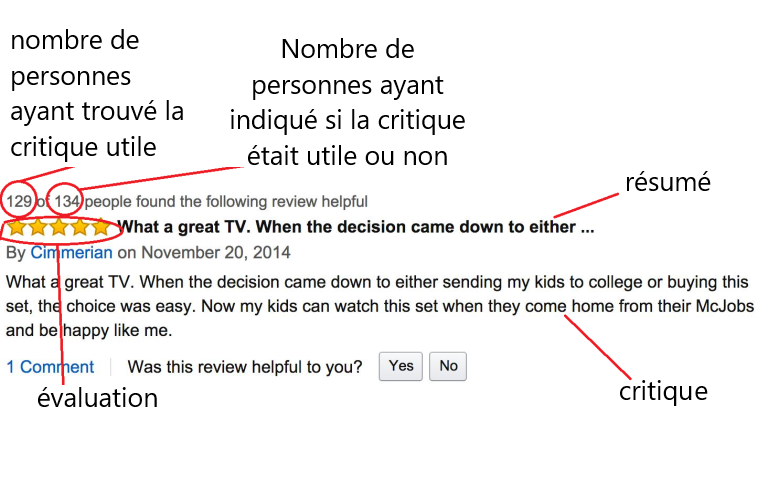

## 2-4 Statistiques descriptives pour les attributs numériques

In [30]:
data['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives spécifiques pour la colonne 'Score' de votre ensemble de données. Voici une description des résultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'écart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observé est 1.

- **25% :** Le premier quartile (Q1) est à 4, ce qui signifie que 25% des scores sont égaux ou inférieurs à 4.

- **50% :** La médiane (Q2) est à 5, ce qui indique que 50% des scores sont égaux ou inférieurs à 5.

- **75% :** Le troisième quartile (Q3) est à 5, ce qui signifie que 75% des scores sont égaux ou inférieurs à 5.

- **max :** Le score maximum observé est 5.

Ces statistiques fournissent un aperçu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent être concentrés autour des valeurs élevées, avec une moyenne de 4.18 et une médiane de 5. Cela suggère une tendance positive dans les évaluations.

## 2-5 Vérification des valeurs manquantes ou d'incohérences

In [12]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Description des resultats :
La sortie que vous avez présentée est le résultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de données. Voici une description des résultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces résultats vous indiquent les colonnes spécifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour décider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les remplaçant par des valeurs par défaut ou en utilisant d'autres méthodes de gestion des données manquantes en fonction du contexte de votre analyse.

## 2-6 Vérifier les valeurs uniques dans chaque colonne

In [32]:
data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de données. Voici une description des résultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est cohérent avec le fait que les scores sont souvent évalués sur une échelle discrète).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent être utiles pour comprendre la diversité des données dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une échelle de notation restreinte. D'un autre côté, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la variété des textes présents dans cet ensemble de données.

# 3- Prétraitement des données :

## 3-1 Supprimer les lignes en double


In [33]:
data.drop_duplicates(inplace=True)

## 3-2 Gérer les valeurs manquantes

In [34]:
data.dropna(inplace=True)

# 4- Analyse Exploratoire des Données (EDA)

## 4-1 Vérifier la distribution des scores 

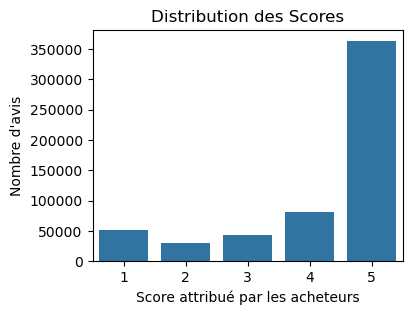

In [35]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.xlabel('Score attribué par les acheteurs')
plt.ylabel('Nombre d\'avis')
plt.show()

### Expliquons les résultats :

- **Score 5 :** Il y a 363,122 occurrences où le score est égal à 5.
  
- **Score 4 :** Il y a 80,655 occurrences où le score est égal à 4.

- **Score 1 :** Il y a 52,268 occurrences où le score est égal à 1.

- **Score 3 :** Il y a 42,640 occurrences où le score est égal à 3.

- **Score 2 :** Il y a 29,769 occurrences où le score est égal à 2.

Ces résultats donnent une vue détaillée de la distribution des scores dans votre ensemble de données. Par exemple, le score 5 est largement plus fréquent que les autres scores, suggérant que la majorité des évaluations sont positives. À l'inverse, les scores 1, 2 et 3 sont moins fréquents, indiquant une proportion plus faible d'évaluations négatives ou neutres. Cette information peut être utile pour comprendre la tendance générale des évaluations dans votre ensemble de données.

## 4-2 Afficher quelques exemples de résumés et de textes

In [23]:
print("Exemples de résumés :")
print(data['Summary'].sample(2).values)

print("\nExemples de textes :")
data['Text'].sample(2).values

Exemples de résumés :
['Excellent' 'OMH dog biscuits']

Exemples de textes :


array(["Great popcorn.  My family and I love watching movies and eating popcorn.  We consume more popcorn during the fall and winter months.  We received this popcorn and quickly made our first batch.  Wow.......It was great.  We made the mistake of not mixing everything together (oil, popcorn, and buttery salt).  That was our fault because we didn't read the instructions due to excitement.  But our first batch was still very good (a little salty because we added the salt mix last).  We made another batch two days later and it was awesome.  This is as close to theater popcorn made in our house ever.  It was really, really good.  Every kernell popped and it was a perfect balance.  We will NEVER, and I mean NEVER buy microwave or store popcorn again....We will be placing another order very soon.  I almost forgot to mention that we bought the 8oz bags.  That was enough for a large bowl which will feed 2-3 of us.  Can't wait to order another batch.....Enjoy",
       'I was very dissappoint

## 4-3 Calcul de la moyenne et de la médiane des scores dans les données

In [37]:
print("Average Score: ",np.mean(data.Score))
print("Median Score: ",np.median(data.Score))

Average Score:  4.183296651483723
Median Score:  5.0


Comme nous pouvons l'observer, la majorité des scores sont égaux à 4 et 5, avec une moyenne de 4,18. En raison de la distribution très inclinée vers la gauche, nous ferons une prédiction binaire. Nous pouvons considérer qu'un avis négatif aura un score entre 1 et 3, et un avis positif aura un score égal à 4 ou 5.

## 4-4 Distribution des avis positifs et négatifs

In [38]:
# Créer des conditions pour chaque catégorie
positive_condition = data['Score'] > 3
neutral_condition = data['Score'] == 3
negative_condition = data['Score'] < 3

# Mettre à jour la colonne 'Sentiment' en utilisant les conditions
data['Sentiment'] = np.select([positive_condition, neutral_condition, negative_condition], 
                               ['POSITIF', 'NEUTRE', 'NEGATIF'], 
                               default='NEUTRE')

Après avoir créé une nouvelle variable appelée Sentiment, définie comme NÉGATIVE lorsque le score est compris entre 1 et 2, 3 c'est neutre et POSITIVE lorsque le score est égal à 4 ou 5, nous obtenons cette nouvelle distribution :

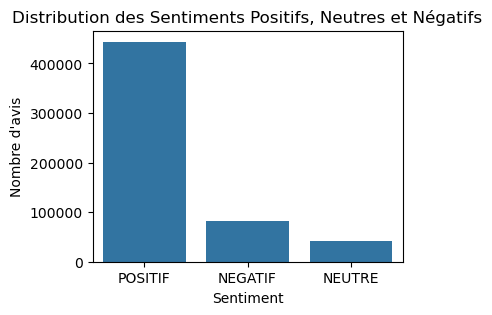

In [39]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
sns.countplot(x='Sentiment', data=data, ax=ax)
ax.set_title('Distribution des Sentiments Positifs, Neutres et Négatifs')
ax.set_ylabel("Nombre d'avis")
plt.show()

Les résultats du graphique montrent que le nombre d'avis positifs ("POSITIF") est le plus élevé, totalisant 443,756 occurrences. Les avis négatifs ("NEGATIF") s'élèvent à 82,007, tandis que les avis neutres ("NEUTRE") sont au nombre de 42,638. Cette répartition permet une visualisation claire de la distribution des sentiments dans l'ensemble de données.

# 5- Traitement du texte

### ON VA TRAVAILLER SUR 100000 LIGNE

In [16]:
data = data.head(100000)

le code suivant réalise les actions suivantes :

1. Gère les valeurs manquantes en remplaçant par des chaînes vides.
2. Applique un processus de prétraitement au texte dans les colonnes 'Summary' et 'Text', supprimant la ponctuation, mettant en minuscules et supprimant les stopwords.

In [56]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Vérifier si le texte ressemble à une URL
    if re.match(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text):
        # Si c'est une URL, vous pouvez utiliser une bibliothèque comme requests pour récupérer le contenu
        # text = récupérer_contenu_de_lurl(text)
        pass
    else:
        # Supprimer les balises HTML avec BeautifulSoup
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Supprimer les caractères non alphabétiques
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convertir le texte en minuscules
    text = text.lower()

    # Supprimer les stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

tqdm.pandas()
data['Processed_Text'] = data['Text'].progress_apply(preprocess_text)

# Afficher les premières lignes après le prétraitement
data.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

C:\Users\BYDEVMAR\AppData\Local\Temp\ipykernel_6660\2932768173.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Processed_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIF,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIF,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIF,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NEGATIF,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIF,great taffy great price wide assortment yummy ...


# 5- Utilisation de modèle pré-entraîné Roberta
## 5-1 Initialisation du Modèle RoBERTa pour l'Analyse de Sentiments

In [17]:
# Définition du modèle pré-entraîné à utiliser (dans ce cas, le modèle de sentiment basé sur RoBERTa pour Twitter)
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialisation du tokenizer avec le modèle pré-entraîné
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialisation du modèle de classification de séquence basé sur RoBERTa pour Twitter
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## 5-2 Fonction d'Évaluation des Scores de RoBERTa pour l'Analyse de Sentiments
Cette fonction, nommée "roberta_scores", prend en entrée un exemple de texte, l'encode à l'aide du tokenizer associé au modèle RoBERTa pré-entraîné pour l'analyse de sentiments sur Twitter, puis utilise le modèle pour obtenir des scores de sentiment. Les scores sont ensuite normalisés avec la fonction softmax et renvoyés sous forme de dictionnaire comprenant les probabilités associées aux classes négative, neutre et positive.

In [23]:
def roberta_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits.detach().numpy()
    scores = softmax(scores, axis=1)
    scores_dict = {
        'rta_neg': scores[0, 0],
        'rta_neu': scores[0, 1],
        'rta_pos': scores[0, 2]
    }
    return scores_dict

## 5-3 Analyse de Sentiments avec RoBERTa sur l'Ensemble de Données
Ce code parcourt chaque ligne de l'ensemble de données 'data', récupère le texte et l'identifiant associé, puis utilise la fonction 'roberta_scores' pour effectuer une analyse de sentiment avec le modèle RoBERTa pré-entraîné. Les résultats de RoBERTa sont ensuite stockés dans un dictionnaire 'res', associant chaque identifiant à ses scores de sentiment correspondants. En cas d'erreur de type RuntimeError, un message est affiché indiquant l'échec de l'analyse pour un identifiant spécifique.

In [26]:
res = {}
# Diviser les données en 10 parties
num_parts = 10
part_size = len(data) // num_parts
for part in range(num_parts):
    start_idx = part * part_size
    end_idx = min((part + 1) * part_size, len(data))
    part_data = data.iloc[start_idx:end_idx]

    for i, row in tqdm(part_data.iterrows(), total=len(part_data)):
        try:
            text = row['Processed_Text']  
            my_id = row['Id']
            # Effectuer une analyse de sentiment avec RoBERTa
            roberta_result = roberta_scores(text)
            # Conserver uniquement les résultats de RoBERTa
            res[my_id] = roberta_result
        except Exception as e:
            print(f'Problème dans ID {my_id} : {e}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 540 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Problème dans ID 1321 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Problème dans ID 1498 : The expanded size of the tensor (564) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 564].  Tensor sizes: [1, 514]
Problème dans ID 2248 : The expanded size of the tensor (619) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 619].  Tensor sizes: [1, 514]
Problème dans ID 8077 : The expanded size of the tensor (582) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 582].  Tensor sizes: [1, 514]
Problème dans ID 8757 : The expanded size of the tensor (999) must match the existing size (514) at non-singleton dimensi

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 10005 : The expanded size of the tensor (1163) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1163].  Tensor sizes: [1, 514]
Problème dans ID 18192 : The expanded size of the tensor (604) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 604].  Tensor sizes: [1, 514]
Problème dans ID 19568 : The expanded size of the tensor (737) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 737].  Tensor sizes: [1, 514]
Problème dans ID 19828 : The expanded size of the tensor (578) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 578].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 20420 : The expanded size of the tensor (897) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 897].  Tensor sizes: [1, 514]
Problème dans ID 22479 : The expanded size of the tensor (525) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 525].  Tensor sizes: [1, 514]
Problème dans ID 22484 : The expanded size of the tensor (535) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 535].  Tensor sizes: [1, 514]
Problème dans ID 26115 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Problème dans ID 27541 : The expanded size of the tensor (688) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 688].  Tensor sizes: [1, 514]
Problème dans ID 27585 : The expanded size of the tensor (594) must match the existing size (514) at non-singleton 

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 37506 : The expanded size of the tensor (700) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 700].  Tensor sizes: [1, 514]
Problème dans ID 38776 : The expanded size of the tensor (588) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 588].  Tensor sizes: [1, 514]
Problème dans ID 39098 : The expanded size of the tensor (785) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 785].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 41068 : index out of range in self
Problème dans ID 41623 : The expanded size of the tensor (704) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 704].  Tensor sizes: [1, 514]
Problème dans ID 42251 : The expanded size of the tensor (529) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 529].  Tensor sizes: [1, 514]
Problème dans ID 42656 : The expanded size of the tensor (624) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 624].  Tensor sizes: [1, 514]
Problème dans ID 42889 : The expanded size of the tensor (617) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 617].  Tensor sizes: [1, 514]
Problème dans ID 44204 : The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]
Problème dans ID 44416 : The expanded size of the tensor (684) 

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 50686 : The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]
Problème dans ID 50910 : The expanded size of the tensor (536) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 536].  Tensor sizes: [1, 514]
Problème dans ID 51901 : The expanded size of the tensor (700) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 700].  Tensor sizes: [1, 514]
Problème dans ID 52278 : The expanded size of the tensor (529) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 529].  Tensor sizes: [1, 514]
Problème dans ID 54230 : The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]
Problème dans ID 54559 : index out of range in self
Problème dans ID 54710 : The expanded size of the tensor (662) 

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 60395 : The expanded size of the tensor (955) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 955].  Tensor sizes: [1, 514]
Problème dans ID 60995 : The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]
Problème dans ID 63158 : The expanded size of the tensor (795) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 795].  Tensor sizes: [1, 514]
Problème dans ID 63738 : The expanded size of the tensor (799) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 799].  Tensor sizes: [1, 514]
Problème dans ID 66311 : The expanded size of the tensor (684) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 684].  Tensor sizes: [1, 514]
Problème dans ID 66877 : The expanded size of the tensor (558) must match the existing size (514) at non-singleton 

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 70240 : The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]
Problème dans ID 72705 : The expanded size of the tensor (805) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 805].  Tensor sizes: [1, 514]
Problème dans ID 72921 : The expanded size of the tensor (618) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 618].  Tensor sizes: [1, 514]
Problème dans ID 74281 : The expanded size of the tensor (535) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 535].  Tensor sizes: [1, 514]
Problème dans ID 75290 : The expanded size of the tensor (594) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 594].  Tensor sizes: [1, 514]
Problème dans ID 75354 : The expanded size of the tensor (564) must match the existing size (514) at non-singleton 

  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 81797 : The expanded size of the tensor (656) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 656].  Tensor sizes: [1, 514]
Problème dans ID 87032 : The expanded size of the tensor (724) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 724].  Tensor sizes: [1, 514]
Problème dans ID 87878 : The expanded size of the tensor (656) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 656].  Tensor sizes: [1, 514]
Problème dans ID 89634 : The expanded size of the tensor (641) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 641].  Tensor sizes: [1, 514]
Problème dans ID 89818 : The expanded size of the tensor (530) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 530].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Problème dans ID 93483 : The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Problème dans ID 93797 : The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Problème dans ID 94382 : The expanded size of the tensor (752) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 752].  Tensor sizes: [1, 514]
Problème dans ID 95321 : The expanded size of the tensor (537) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 537].  Tensor sizes: [1, 514]
Problème dans ID 97611 : The expanded size of the tensor (1030) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1030].  Tensor sizes: [1, 514]
Problème dans ID 99304 : The expanded size of the tensor (738) must match the existing size (514) at non-singleto

In [29]:
# Affichage du dictionnaire résultant de l'analyse de sentiment avec RoBERTa
res


{1: {'rta_neg': 0.007874446, 'rta_neu': 0.08880092, 'rta_pos': 0.90332466},
 2: {'rta_neg': 0.08493852, 'rta_neu': 0.8423908, 'rta_pos': 0.07267068},
 3: {'rta_neg': 0.0046725716, 'rta_neu': 0.13230933, 'rta_pos': 0.86301816},
 4: {'rta_neg': 0.0055126064, 'rta_neu': 0.34244046, 'rta_pos': 0.65204686},
 5: {'rta_neg': 0.001966447, 'rta_neu': 0.012693261, 'rta_pos': 0.9853403},
 6: {'rta_neg': 0.0023043938, 'rta_neu': 0.048075844, 'rta_pos': 0.9496198},
 7: {'rta_neg': 0.0020632278, 'rta_neu': 0.012395268, 'rta_pos': 0.9855415},
 8: {'rta_neg': 0.0017318623, 'rta_neu': 0.014302323, 'rta_pos': 0.9839659},
 9: {'rta_neg': 0.0155409295, 'rta_neu': 0.67226887, 'rta_pos': 0.31219015},
 10: {'rta_neg': 0.008339728, 'rta_neu': 0.20592855, 'rta_pos': 0.7857317},
 11: {'rta_neg': 0.14542769, 'rta_neu': 0.32045478, 'rta_pos': 0.5341175},
 12: {'rta_neg': 0.27985084, 'rta_neu': 0.65204746, 'rta_pos': 0.06810173},
 13: {'rta_neg': 0.12532794, 'rta_neu': 0.570371, 'rta_pos': 0.30430102},
 14: {'rta_

## 5-4 Transformation et Fusion des Résultats d'Analyse de Sentiments avec les Données d'Origine

In [28]:
df = pd.DataFrame(res).T
df = df.reset_index().rename(columns={'index': 'Id'})
df = df.merge(data, how='left')
df
df.to_csv('nlp_results.csv', index=False)

Dans cette phase, les résultats de l’analyse de sentiments avec RoBERTa sont
intégrés aux données d’origine. Un DataFrame, df, est créé à partir des scores de
sentiment associés à chaque identifiant. Après transposition et réinitialisation, df
est fusionné avec l’ensemble de données initial (data) basé sur la colonne ’Id’. Cette
fusion permet de combiner les scores de sentiment RoBERTa avec les informations
d’origine pour chaque entrée. Le DataFrame final est exporté en CSV sous le nom
nlp_results.csv, facilitant ainsi l’exploration ultérieure des résultats d’analyse de
sentiments

# 6- Résultats

## 6-1 Charger les données à partir du fichier CSV

In [3]:
l_df = pd.read_csv('nlp_result.csv')
l_df.head()

,Id,rta_neg,rta_neu,rta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Processed_Text
0,1,0.007874,0.088801,0.903325,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIF,bought several vitality canned dog food produc...
1,2,0.084939,0.842391,0.072671,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIF,product arrived labeled jumbo salted peanutsth...
2,3,0.004673,0.132309,0.863018,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIF,confection around centuries light pillowy citr...
3,4,0.005513,0.342440,0.652047,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NEGATIF,looking secret ingredient robitussin believe f...
4,5,0.001966,0.012693,0.985340,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIF,great taffy great price wide assortment yummy ...


## 6-3 Distribution des Sentiments Prédits par ROBERTA

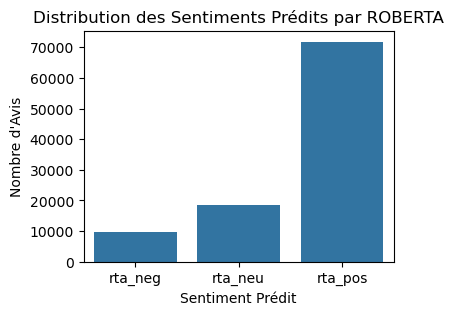

In [9]:
# Créer une colonne 'Sentiment' basée sur les probabilités prédites
l_df['Sentiment'] = l_df[['rta_neg', 'rta_neu', 'rta_pos']].idxmax(axis=1)

# Plot
plt.figure(figsize=(4, 3))
sns.countplot(x='Sentiment', data=l_df, order=['rta_neg', 'rta_neu', 'rta_pos'])
plt.title('Distribution des Sentiments Prédits par ROBERTA')
plt.xlabel('Sentiment Prédit')
plt.ylabel('Nombre d\'Avis')
plt.show()

La distribution des sentiments prédits par ROBERTA sur l'ensemble de vos avis est la suivante :

- Sentiment Positif (rta_pos) : 71,827 occurrences
- Sentiment Neutre (rta_neu) : 18,492 occurrences
- Sentiment Négatif (rta_neg) : 9,607 occurrences

Cela indique que la majorité des avis ont été prédits comme ayant un sentiment positif par ROBERTA, suivi par les avis neutres, et une proportion plus faible d'avis négatifs. Cette répartition peut être utile pour comprendre la tendance générale des sentiments dans votre ensemble de données analysé par le modèle ROBERTA.

## 6-4 Distribution des Sentiments ROBERTA selon les Scores

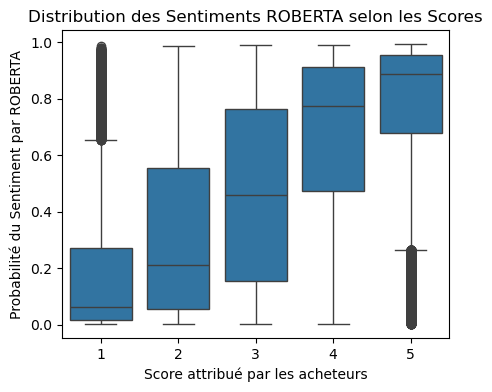

In [10]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Score', y='rta_pos', data=l_df)
plt.title('Distribution des Sentiments ROBERTA selon les Scores')
plt.xlabel('Score attribué par les acheteurs')
plt.ylabel('Probabilité du Sentiment')
plt.show()

On Constate que la distribution des prédictions de sentiment générées par le modèle ROBERTA, classées selon les scores attribués par les acheteurs. Les scores plus élevés tendent à avoir des prédictions de sentiment positif plus élevées, tandis que les scores plus bas montrent une variabilité plus large des prédictions. Ces informations offrent un aperçu de la corrélation entre les évaluations des acheteurs et les sentiments prédits par le modèle.

## 6-5 Diagramme circulaire des proportions de sentiments

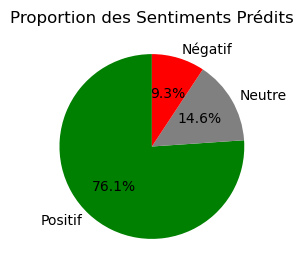

In [23]:
plt.figure(figsize=(4, 3))
nombre_sentiments = [len(l_df[l_df['rta_pos'] >= 0.5]),
                    len(l_df[(l_df['rta_neu'] >= 0.5) & (l_df['rta_pos'] < 0.5)]),
                    len(l_df[l_df['rta_neg'] >= 0.5])]

etiquettes = ['Positif', 'Neutre', 'Négatif']
couleurs = ['green', 'gray', 'red']

plt.pie(nombre_sentiments, labels=etiquettes, colors=couleurs, autopct='%1.1f%%', startangle=90)
plt.title('Proportion des Sentiments Prédits')
plt.show()


La majorité des prédictions sont positives, représentant 76% du total. Les prédictions neutres sont moins fréquentes, constituant seulement 14.6%, tandis que les prédictions négatives représentent 9.3% de l'ensemble des observations. Ces proportions offrent un aperçu clair de la préférence du modèle pour des sentiments majoritairement positifs.

C:\Users\BYDEVMAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

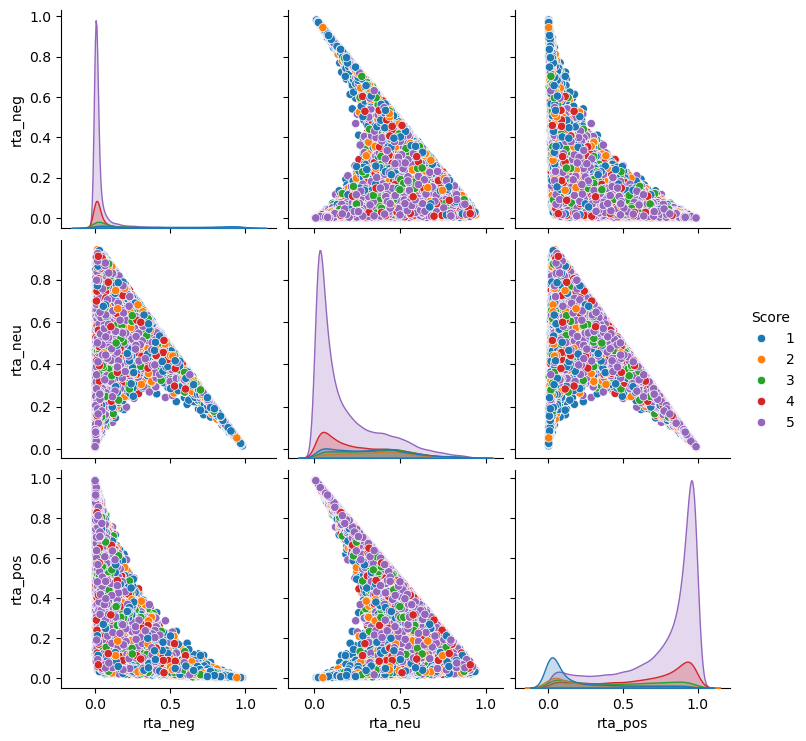

In [33]:
plt.figure(figsize=(8, 5))
sns.pairplot(data=l_df,
             vars=['rta_neg', 'rta_neu', 'rta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## 6-6 Nuage de mots des avis positifs et négatifs

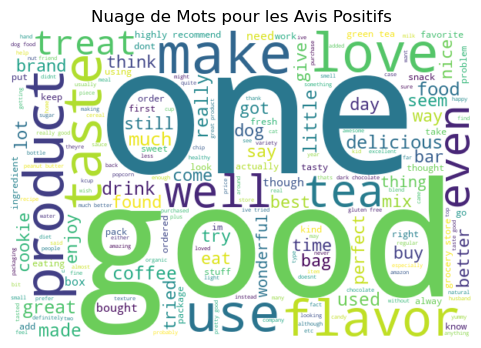

In [12]:
# Filtrer les textes prédits comme positifs
texte_positif = ' '.join(l_df[l_df['rta_pos'] >= 0.5]['Processed_Text'])

# Générer le nuage de mots pour les textes positifs
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(texte_positif)

# Afficher le nuage de mots
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis Positifs')
plt.show()

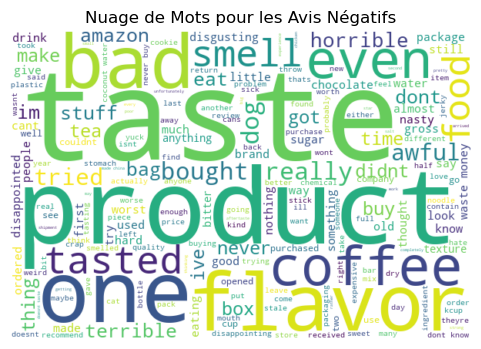

In [25]:
# Filtrer les textes prédits comme négatifs
texte_negatif = ' '.join(l_df[l_df['rta_neg'] >= 0.9]['Processed_Text'])

# Générer le nuage de mots pour les textes négatifs
wordcloud_negatif = WordCloud(width=600, height=400, background_color='white').generate(texte_negatif)

# Afficher le nuage de mots pour les textes négatifs
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis Négatifs')
plt.show()

# 7- Points Faibles

### Analyse des textes mal classés

Même si la plupart des textes sont correctement classés, il y aura toujours quelques phrases ambiguës et mal classées. Parfois, elles peuvent sembler positives, mais en réalité, elles sont négatives. De la même manière, des phrases positives peuvent parfois sembler négatives. À présent, explorons quelques textes que nos modèles classent incorrectement.

In [68]:
l_df.query("Score == 1").sort_values("rta_pos" , ascending=False)['Text'].values[0]

"I was excited to find this and read the great reviews.  I ordered it at $15+ from Amazon, and it does work and taste great in our large school popcorn maker. HOWEVER, it's offered for $3.48 at our local food warehouse!!  Wow, Amazon is really making some money off this one.  Shop local before you buy this overpriced wonder."

**ICI La critique est négatif. La personne exprime d'abord de l'enthousiasme, mais devient insatisfaite en découvrant une différence de prix significative entre l'achat sur Amazon et l'entrepôt alimentaire local. La déclaration "Wow, Amazon se fait vraiment de l'argent avec celui-ci" et la recommandation de "Magasiner localement avant d'acheter cette merveille hors de prix" indiquent un sentiment négatif.**

In [72]:
l_df.query("Score == 5").sort_values("rta_neg" , ascending=False)['Text'].values[1]

"I've eaten other brands of unsalted potato chips and they've always been terrible.  I didn't expect much when I bought these.  But after I tasted them I was amazed.  I have never enjoyed unsalted potato chips before these.  They have a natural potato flavor with thick, crunchy chips.  The only bad thing is the bag is a pain to open.  Use scissors and save yourself the aggravation."

**Le sentiment dans ce texte est positif. La personne avait initialement des attentes basses en se basant sur des expériences passées avec d'autres marques de chips de pommes de terre non salées, mais a été agréablement surprise et émerveillée après avoir essayé celles-ci. Les aspects positifs mentionnés comprennent une saveur naturelle de pomme de terre avec des chips épaisses et croquantes. Cependant, un problème mineur est noté avec la difficulté d'ouvrir le sac, et la suggestion est donnée d'utiliser des ciseaux pour éviter l'aggravation. Dans l'ensemble, le ton est favorable.**

# 8- Conclusion

En conclusion, ce projet d'analyse de sentiment a utilisé une approche complète pour examiner les sentiments exprimés dans un vaste ensemble de critiques Amazon. Depuis l'installation des bibliothèques Python essentielles jusqu'à l'intégration du modèle RoBERTa, le parcours a permis de comprendre la structure du jeu de données et de prédire les sentiments avec une confiance élevée, en mettant en lumière une tendance positive dominante.

### Réflexion :
Cette analyse a mis en évidence des limitations, notamment des défis liés à la classification erronée de déclarations ambiguës. Les critiques mal classées ont fourni des enseignements importants sur les limites du modèle, soulignant la nécessité d'une approche plus nuancée. De plus, il est crucial de noter que le traitement de 100 000 lignes sur mon ordinateur personnel avec un processeur central (CPU) a pris environ 10 heures, représentant seulement 1/5 de la dataframe complète. Cette considération souligne la nécessité d'optimiser les performances pour gérer des ensembles de données plus vastes.

### Amélioration :
Pour améliorer le modèle, des ajustements peuvent être apportés pour mieux traiter des expressions de sentiment complexes. Explorer des stratégies pour gérer des jeux de données plus vastes et diversifiés pourrait renforcer la généralisation du modèle dans différents contextes.

En résumé, bien que ce projet ait réussi à explorer les nuances des sentiments dans les critiques Amazon, une réflexion continue et des améliorations itératives sont nécessaires pour perfectionner la précision du modèle dans des scénarios variés.

# 9- Ressources


- Xinyue Zhao et Yuandong Sun. (2022). "Amazon Fine Food Reviews with BERT Model." Procedia Computer Science, Volume 208, Pages 401-406. DOI: [10.1016/j.procs.2022.10.056](https://doi.org/10.1016/j.procs.2022.10.056). Elsevier B.V. Available online at: [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S1877050922014971).

- Hugging Face. (2022). Documentation Transformers - Modèle RoBERTa. https://huggingface.co/docs/transformers/model_doc/roberta

- Mulla, R. (2022). Projet d'analyse de sentiment en Python avec NLTK et 🤗 Transformers. Classifiez les critiques d'Amazon !! [Vidéo]. YouTube. https://www.youtube.com/watch?v=QpzMWQvxXWk

- Robikscube. (2022). Analyse de sentiment en Python 🤗 [Didacticiel sur YouTube]. Kaggle. https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

<center>
  <h1> Thanks For Reading! </h1>
</center>